In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("C:\\Users\\Garima\\Downloads\\cleaned_data.csv")

In [4]:
df.shape

(244, 15)

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1.0
1,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1.0
2,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1.0
3,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1.0
4,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1.0


In [6]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

In [7]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [8]:
df['Classes'].value_counts()

1    138
0    106
Name: Classes, dtype: int64

In [9]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [10]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0,1.0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0,1.0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0,1.0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,1.0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0,1.0


In [11]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 244, dtype: float64

## Features for Regression problem : 

From the visual data analysis it has been observed that For Fire cases FWI is really high. So for regression analysis we should try to find out FWI for the given set of Features. So, higher FWI will automatically point to higher probability of fire incident. So, for Regression problem we should omit 'FWI' from the input features.


In [12]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
X_train.shape,X_test.shape

((183, 11), (61, 11))

In [14]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.664492,-0.249312,-0.375047,0.703238,0.485379,0.374673,0.607478,0.459776,0.512818,0.256099
RH,-0.664492,1.000000,0.235766,0.262550,-0.637201,-0.398168,-0.215075,-0.691612,-0.345860,-0.429397,-0.397053
Ws,-0.249312,0.235766,1.000000,0.262759,-0.169489,-0.013533,0.073923,0.011260,0.023266,-0.078171,-0.229797
Rain,-0.375047,0.262550,0.262759,1.000000,-0.585018,-0.291338,-0.296114,-0.354277,-0.301666,-0.394262,-0.096985
FFMC,0.703238,-0.637201,-0.169489,-0.585018,1.000000,0.602278,0.508348,0.745644,0.593647,0.774398,0.237434
DMC,0.485379,-0.398168,-0.013533,-0.291338,0.602278,1.000000,0.877045,0.657983,0.982049,0.580530,0.197489
DC,0.374673,-0.215075,0.073923,-0.296114,0.508348,0.877045,1.000000,0.503266,0.940947,0.501279,-0.079217
ISI,0.607478,-0.691612,0.011260,-0.354277,0.745644,0.657983,0.503266,1.000000,0.631317,0.745431,0.264224
BUI,0.459776,-0.345860,0.023266,-0.301666,0.593647,0.982049,0.940947,0.631317,1.000000,0.583986,0.093371
Classes,0.512818,-0.429397,-0.078171,-0.394262,0.774398,0.580530,0.501279,0.745431,0.583986,1.000000,0.158763


## Feature Selection

<Axes: >

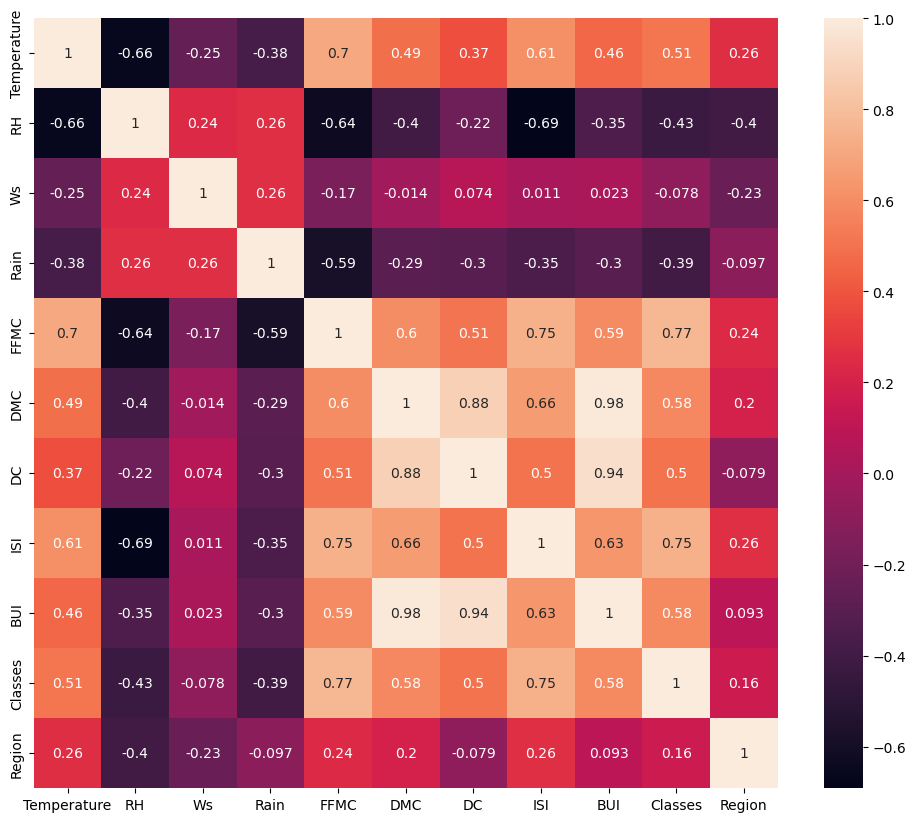

In [15]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)


In [16]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.664492,-0.249312,-0.375047,0.703238,0.485379,0.374673,0.607478,0.459776,0.512818,0.256099
RH,-0.664492,1.000000,0.235766,0.262550,-0.637201,-0.398168,-0.215075,-0.691612,-0.345860,-0.429397,-0.397053
Ws,-0.249312,0.235766,1.000000,0.262759,-0.169489,-0.013533,0.073923,0.011260,0.023266,-0.078171,-0.229797
Rain,-0.375047,0.262550,0.262759,1.000000,-0.585018,-0.291338,-0.296114,-0.354277,-0.301666,-0.394262,-0.096985
FFMC,0.703238,-0.637201,-0.169489,-0.585018,1.000000,0.602278,0.508348,0.745644,0.593647,0.774398,0.237434
DMC,0.485379,-0.398168,-0.013533,-0.291338,0.602278,1.000000,0.877045,0.657983,0.982049,0.580530,0.197489
DC,0.374673,-0.215075,0.073923,-0.296114,0.508348,0.877045,1.000000,0.503266,0.940947,0.501279,-0.079217
ISI,0.607478,-0.691612,0.011260,-0.354277,0.745644,0.657983,0.503266,1.000000,0.631317,0.745431,0.264224
BUI,0.459776,-0.345860,0.023266,-0.301666,0.593647,0.982049,0.940947,0.631317,1.000000,0.583986,0.093371
Classes,0.512818,-0.429397,-0.078171,-0.394262,0.774398,0.580530,0.501279,0.745431,0.583986,1.000000,0.158763


In [17]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [19]:
corr_features

{'BUI', 'DC'}

In [20]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((183, 9), (61, 9))

## Feature Scaling Or Standardization

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [22]:
X_train_scaled

array([[-0.81085018,  0.16311382,  1.29231566, ..., -0.77409606,
        -1.1098231 , -1.00547949],
       [ 1.06405791, -0.44884168,  0.15167049, ...,  0.84971776,
         0.9010445 ,  0.99455037],
       [-0.27516216,  0.63907922, -0.60875963, ..., -0.21666743,
         0.9010445 ,  0.99455037],
       ...,
       [-1.88222624,  0.91105944,  0.53188555, ..., -1.08916441,
        -1.1098231 , -1.00547949],
       [ 0.26052587, -0.38084663,  0.15167049, ...,  0.48617735,
         0.9010445 ,  0.99455037],
       [-0.54300617,  0.9790545 ,  2.05274578, ..., -0.87104017,
        -1.1098231 , -1.00547949]])

## Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)

LinearRegression()

In [24]:
## prediction for the test data
y_pred_linear_reg=linreg.predict(X_test_scaled)

In [25]:
## print the coefficients
print(linreg.coef_)

[-0.00938081 -0.1163507   0.06247836 -0.05623522 -0.81157106  3.57272188
  4.60053476  0.49465899 -0.40063495]


In [26]:
## print the intercept
print(linreg.intercept_)

6.9568306010928955


In [27]:
mae=mean_absolute_error(y_test,y_pred_linear_reg)
MSE = mean_squared_error(y_test,y_pred_linear_reg)
score=r2_score(y_test,y_pred_linear_reg)
print("Mean absolute error", mae)
print("mean_squared_error",MSE)
print("R2 Score", score)

Mean absolute error 0.5516452785962682
mean_squared_error 0.5604072092821928
R2 Score 0.990325441548238


## Lasso Regression

In [28]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred_lasso=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred_lasso)
MSE = mean_squared_error(y_test,y_pred_lasso)
score=r2_score(y_test,y_pred_lasso)
print("Mean absolute error", mae)
print("mean_squared_error",MSE)
print("R2 Score", score)

Mean absolute error 1.1862508609509752
mean_squared_error 2.738810860288379
R2 Score 0.9527186921986257


## Ridge Regression model

In [29]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred_ridge=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred_ridge)
MSE = mean_squared_error(y_test,y_pred_ridge)
score=r2_score(y_test,y_pred_ridge)
print("Mean absolute error", mae)
print("mean_squared_error",MSE)
print("R2 Score", score)

Mean absolute error 0.5779554428412208
mean_squared_error 0.5994739929606641
R2 Score 0.9896510143175394


In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# SVR

In [31]:
regessorsvr = SVR()
regessorsvr.fit(X_train_scaled,y_train)
y_pred_SVR=regessorsvr.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred_SVR)
MSE = mean_squared_error(y_test,y_pred_SVR)
score=r2_score(y_test,y_pred_SVR)
print("Mean absolute error", mae)
print("mean_squared_error",MSE)
print("R2 Score", score)

Mean absolute error 1.5151237677571157
mean_squared_error 11.174364670758894
R2 Score 0.8070919817269445


# KNeighborsRegressor

In [32]:
from sklearn.neighbors import KNeighborsRegressor
regessorknn = KNeighborsRegressor()
regessorknn.fit(X_train_scaled, y_train)
y_pred_Knn=regessorknn.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred_Knn)
MSE = mean_squared_error(y_test,y_pred_Knn)
score=r2_score(y_test,y_pred_Knn)
print("Mean absolute error", mae)
print("mean_squared_error",MSE)
print("R2 Score", score)

Mean absolute error 1.2203278688524588
mean_squared_error 3.6389114754098353
R2 Score 0.9371798556718556


# DecisionTreeRegressor

In [33]:
regessordt = DecisionTreeRegressor()
regessordt.fit(X_train_scaled, y_train)
y_pred_DT=regessordt.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred_DT)
MSE = mean_squared_error(y_test,y_pred_DT)
score=r2_score(y_test,y_pred_DT)
print("Mean absolute error", mae)
print("mean_squared_error",MSE)
print("R2 Score", score)


Mean absolute error 1.0868852459016394
mean_squared_error 2.870655737704918
R2 Score 0.9504425955460407


# RandomForestRegressor

In [34]:
regressorRF = RandomForestRegressor()
regressorRF.fit(X_train_scaled, y_train)
y_pred_RF=regressorRF.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred_RF)
MSE = mean_squared_error(y_test,y_pred_RF)
score=r2_score(y_test,y_pred_RF)
print("Mean absolute error", mae)
print("mean_squared_error",MSE)
print("R2 Score", score)

Mean absolute error 0.8136065573770493
mean_squared_error 1.6093652786885255
R2 Score 0.972216812701515


# Hyperparameter tuning by GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [36]:
grid_search = GridSearchCV(estimator=regressorRF, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [37]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error')

In [38]:
# Print the best parameters 
print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [39]:
# again train our model


In [40]:
regressorRF_ = RandomForestRegressor(max_depth= 10, min_samples_leaf= 4, min_samples_split= 2, n_estimators= 10)
regressorRF_.fit(X_train_scaled, y_train)
y_pred=regressorRF_.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("mean_squared_error",MSE)
print("R2 Score", score)

Mean absolute error 0.8028013621169353
mean_squared_error 1.5444509921771332
R2 Score 0.9733374568488544


### Observation : 
Looking at the above it seems that Linear Regression works pretty well. Next comes Ridge and Random Forest

In [41]:
ltype = [y_pred_linear_reg, y_pred_lasso, y_pred_ridge, y_pred_SVR, y_pred_Knn, y_pred_DT, y_pred_RF]

In [42]:
lnames = ['Linear Regression', 'Lasso', 'Ridge', 'SVR', 'KNN', 'Decision Tree', 'Random Forest']

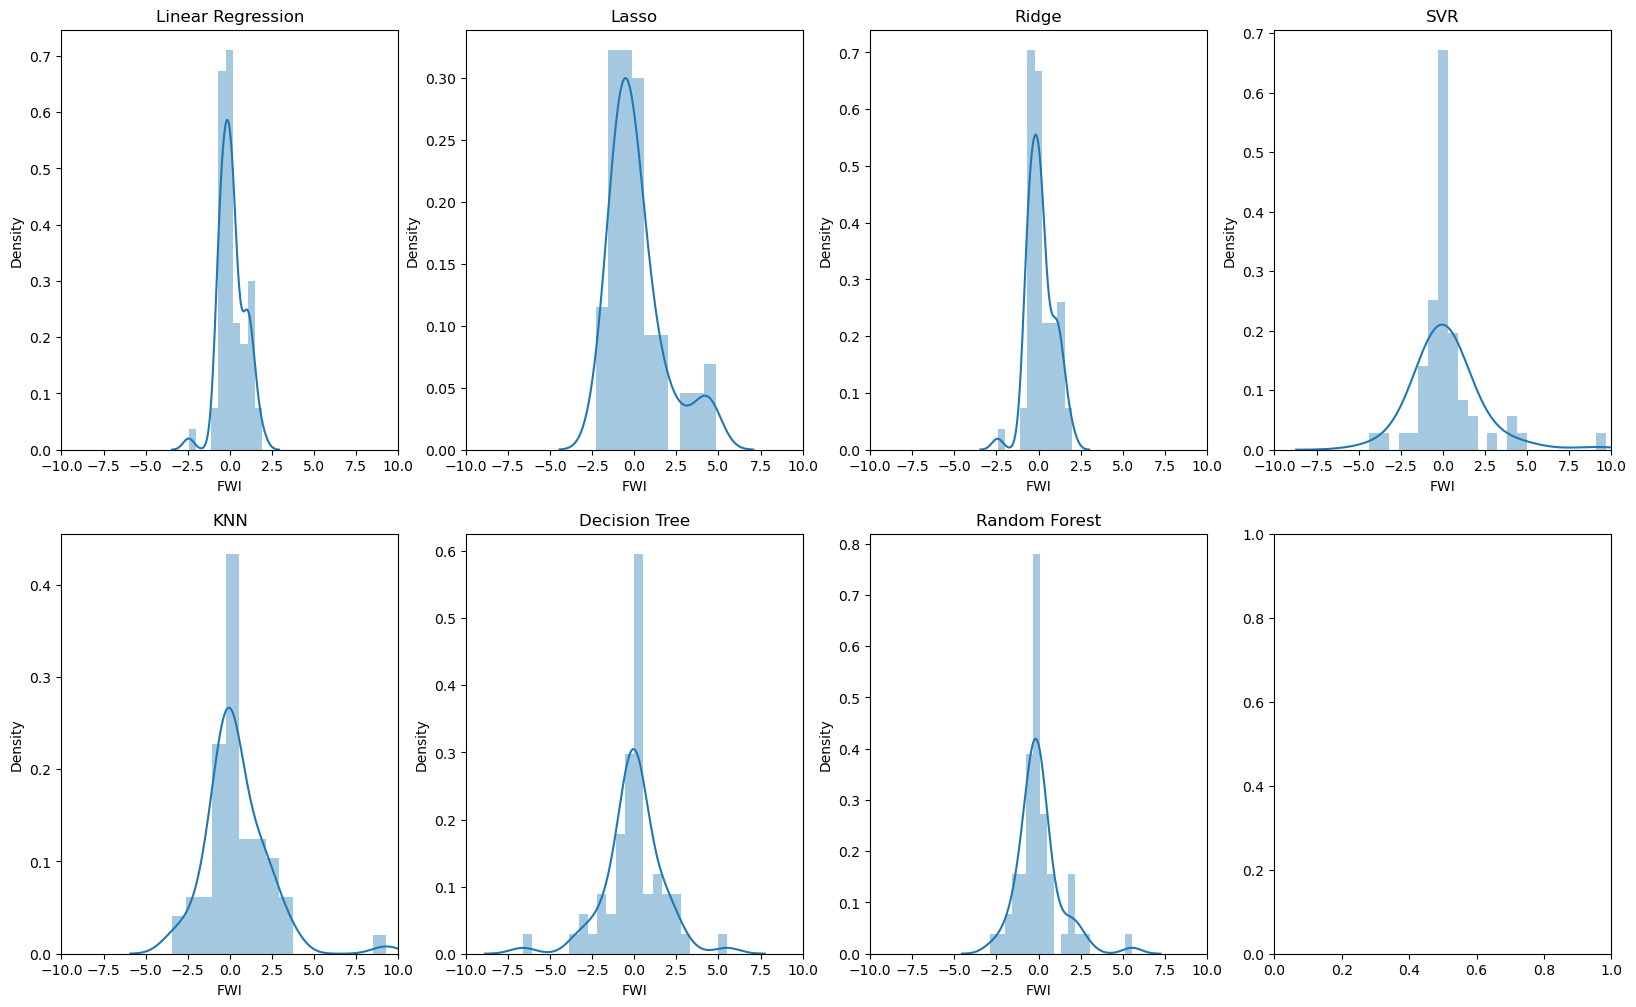

In [43]:
fig, axes = plt.subplots(2,4, figsize=(20,12) )
si = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1], [1,2], [1,3]]

for items in range(0, len(ltype)): 
    i = si[items][0]
    j = si[items][1]
    sns.distplot(y_test - ltype[items], ax=axes[i,j])
    axes[i,j].set_title(lnames[items])   
    axes[i,j].set(xlim=(-10, 10))
    
    
plt.show()

# Observations : 
    

- From the above table it is seen that Linear Regression and Ridge  models have very good R2 scores compare to other models. However, the distribution plots show the spread of deviation is very small but the deviations are asymmetrically distributed about zero. This suggests that there is a bias in predicted values. This might be case of low variance and high bias. This means that we need better optimization or these models may not describe the generalized data. 

- In case of Lasso, KNN and SVM, the variance is more. Addtionally, Lasso has bias. 

- Where as, in case of Decision tree and Random forest, deviations are symmetrically spread about zero and they are reasonably small. In case of Random Forest we have low variance (also evident from the R2 score) and low bias (evident from the above distribution plot).



### Looking at we observe: 
1. R2 score is the highest for Linear Regression. So, one may use this model to predict FWI (our output variable for the regression problem). 

2. Also we observe that the R2 score for Random Forest is not significantly less than Linear Regression. Moreover, the MAE is quite less (~ 24%) than Linear Regression.   

3. Ridge gives a result in between Linear Regression model and Random Forest.  


- So, now the question arises which model to be used.
One can always go with the model which can be intrepreted visually and has lesser number of parameters. So, one can go with Linear Regression. But if one also take in account of MAE and observe the fitting and data, then one should go with Random Forest. 

- This far, things are good and we can use any of the above model for prediction. But before doing that we need to confirm that our model is not overfitting. To check that we need to do cross validation of the above models 
and then conclude anything.    

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
list_model_instance = [linreg, lasso, ridge, regessorknn, regessorsvr, regessordt, regressorRF]

In [46]:
for items in list_model_instance: 
    scores = cross_val_score(items, X_train_scaled, y_train, scoring = 'r2', cv = 10, verbose=1)
    meanscores = np.mean(scores)
    print(items, meanscores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LinearRegression() 0.9442479037679276
Lasso() 0.9237364108687338
Ridge() 0.9448769367933689
KNeighborsRegressor() 0.9306907820878878
SVR() 0.8439565683695667
DecisionTreeRegressor() 0.9351606377424373
RandomForestRegressor() 0.9635542004935811


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.5s finished


It is observed that Random Forest is the best one, then comes the Linear Regression. But as we have mentioned earlier, as the no. of observation set is not a huge one , so we can use both